<center><h1>Moore_Andrew_HW2</h1></center>
<br>
<br>

Name: Andrew Moore
<br>
Github Username: drewm8080
<br>
USC ID: 7583780941

## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import math as m

Get the Cycle Power Plant Data Set

In [5]:
df= pd.read_excel('../data/CCPP/Folds5x2_pp.xlsx')
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


### (b) Exploring the data

#### i. rows and columns

In [6]:
# reference -- https://www.geeksforgeeks.org/count-the-number-of-rows-and-columns-of-a-pandas-dataframe/

print('The number of rows is', df.shape[0])
print('The number of columns is', df.shape[1])
print("The columns represent hourly average tempatures of Average Tempature (AT),Ehaust Vacuume (v),Ambient Pressure (AP), Relative Humidity (RH),Electrical Energy Output (PE)")
print('These are hourly averages where sensors record these features every second')
print('The hourly average examples are the rows')

The number of rows is 9568
The number of columns is 5
The columns represent hourly average tempatures of Average Tempature (AT),Ehaust Vacuume (v),Ambient Pressure (AP), Relative Humidity (RH),Electrical Energy Output (PE)
These are hourly averages where sensors record these features every second
The hourly average examples are the rows


#### ii. pairwise scatterplots of all the varianbles

There is a strong negative linear relationship betweeen AT and PE
There is a weak positive linear relationship between AT and V
There is a weak negative linear relationship between PE and V
There is a weak negative linear relationship between RTH and AT


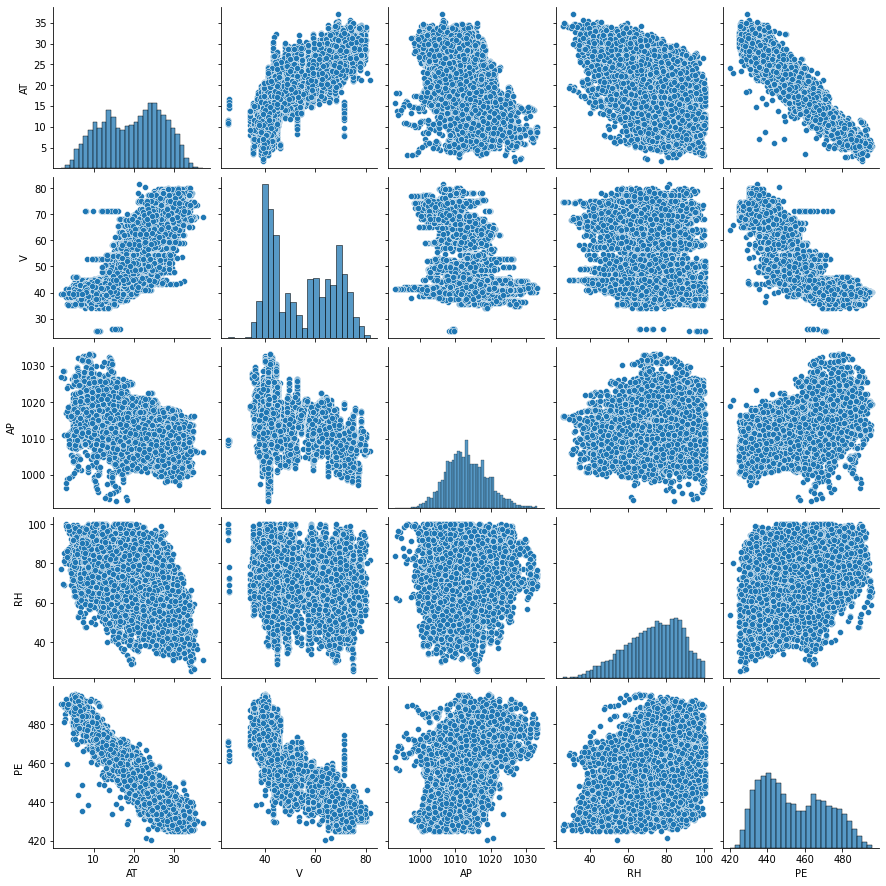

In [7]:
# reference -- https://seaborn.pydata.org/generated/seaborn.pairplot.html

sns.pairplot(df)
print("There is a strong negative linear relationship betweeen AT and PE")
print("There is a weak positive linear relationship between AT and V")
print("There is a weak negative linear relationship between PE and V")
print("There is a weak negative linear relationship between RTH and AT")


#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [8]:
stat = df.describe()
stat.loc['Range'] = stat.loc['max'] - stat.loc['min']
stat.loc['Interquartile Range'] = stat.loc['75%']- stat.loc['25%']
stat

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000
Range,35.300000,56.200000,40.410000,74.600000,75.500000
Interquartile Range,12.210000,24.800000,8.160000,21.502500,28.680000


### (c) Simple Linear Regression

/Users/andrewmoore/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:30:37   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

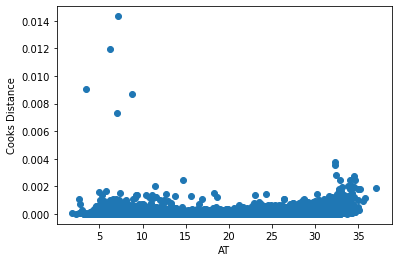

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:30:37   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.0

/Users/andrewmoore/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


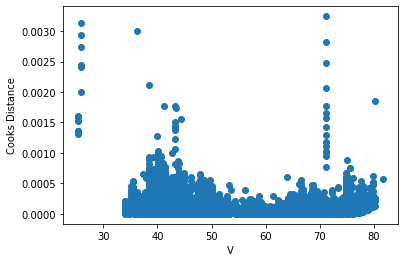

/Users/andrewmoore/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:30:37   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.0

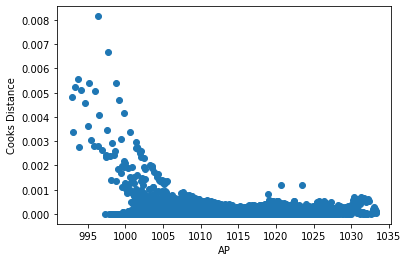

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:30:37   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.0

/Users/andrewmoore/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


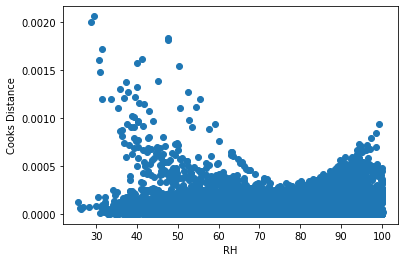

As we can see through the cooks distance plots as well as the metric of cookdistance>4/N, there are many datapoints that are outliers and will need to be removed
All the linear regressions between the dependent and indepedent variable are significant


In [9]:
# reference -- https://www.statology.org/cooks-distance-python/
# keeping track of single regression parameter coeffients
single_regression_parameters = []

# keeping track of the columns 
columns_unprocessed = df.columns
columns = columns_unprocessed[0:-1]
y = df['PE']

# keeping track of r_square values
r_squared_values_single=[]

for feature in columns:
    # creating the linear regression
    x = df[f"{feature}"]
    X = sm.add_constant(x)
    model = sm.OLS(y, X,).fit()
    print_model = model.summary()
    print(print_model)
    
    # now getting cooks distances
    influence = model.get_influence()
    cooks = influence.cooks_distance
    number_obs =[]
    for x in cooks[0]:
        # assuming datapoints greater than 4/N are highly influential 
        if x>(4/len(df)):
            number_obs.append(x)
    print('')
    print('')
    print("For this regression, there are", len(number_obs), "highly influential datapoints")
    print('')
    print('')
    plt.scatter(df[f"{feature}"], cooks[0])
    plt.xlabel(f'{feature}')
    plt.ylabel('Cooks Distance')
    plt.show()
    single_regression_parameters.append(model.params[1])
    r_squared_values_single.append(model.rsquared)
    
    
print("As we can see through the cooks distance plots as well as the metric of cookdistance>4/N, there are many datapoints that are outliers and will need to be removed")
print("All the linear regressions between the dependent and indepedent variable are significant")

As you can see by the four models, each of them is statistically signifcant by following the general
trend of the data. However, some of the R^2 values of some models is better than others


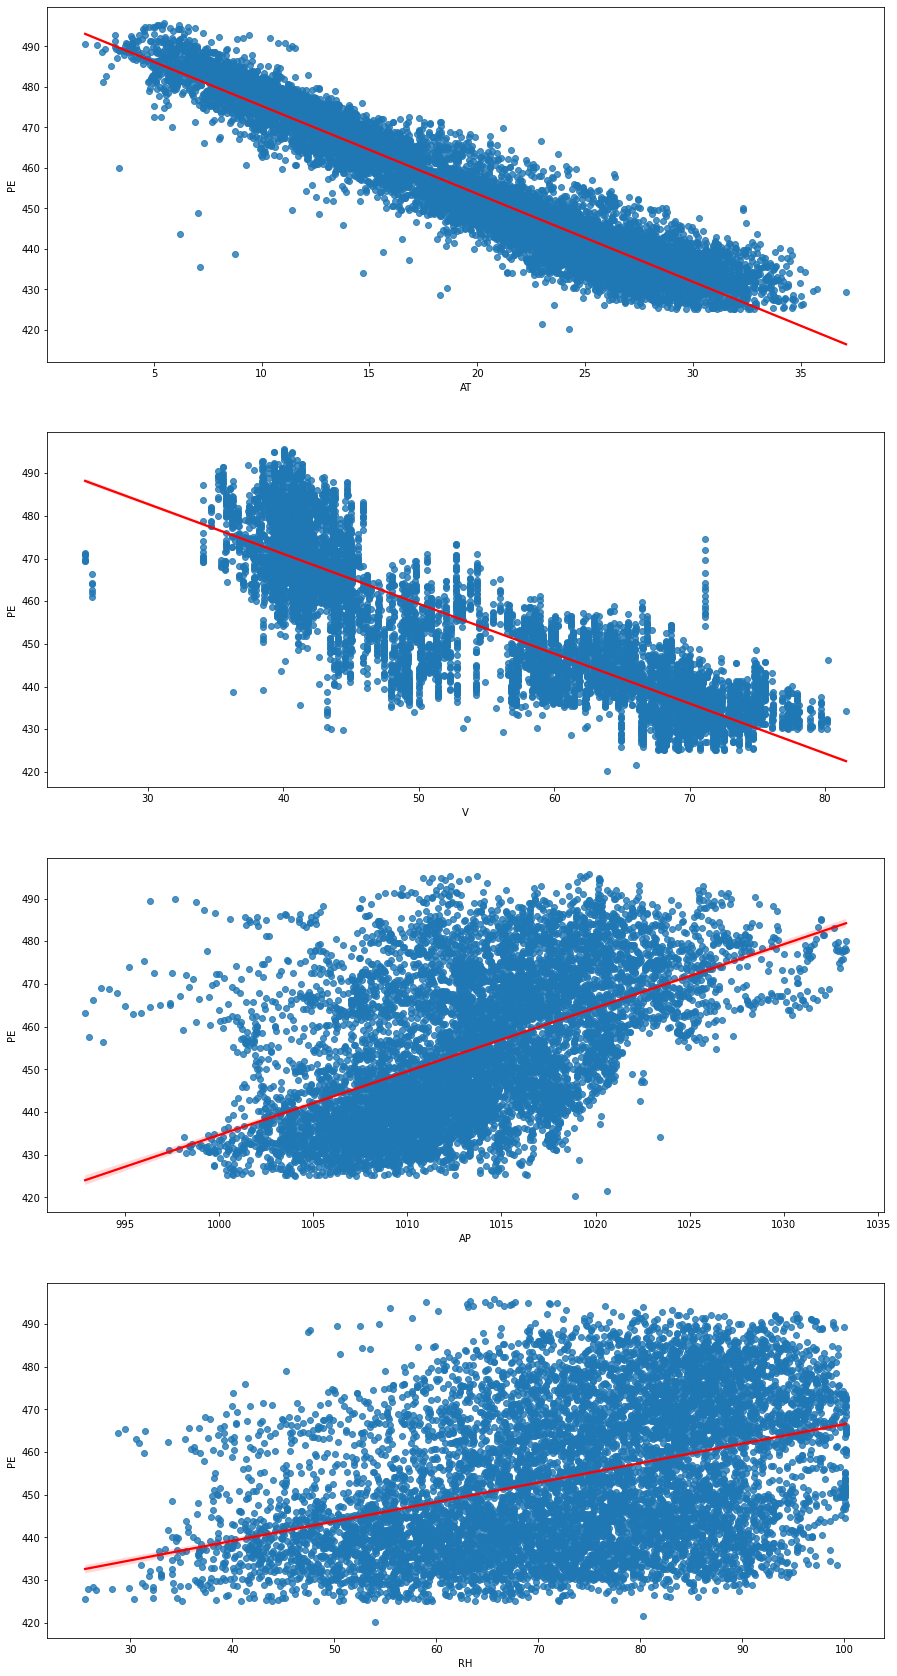

In [10]:
fig, axes = plt.subplots(4, 1, figsize=(15, 30))
sns.regplot(x='AT', y='PE', data=df, ax=axes[0],line_kws={"color": "red"})
sns.regplot(x='V', y='PE', data=df, ax=axes[1],line_kws={"color": "red"})
sns.regplot(x='AP', y='PE', data=df, ax=axes[2],line_kws={"color": "red"})
sns.regplot(x='RH', y='PE', data=df, ax=axes[3],line_kws={"color": "red"})

print("As you can see by the four models, each of them is statistically signifcant by following the general")
print("trend of the data. However, some of the R^2 values of some models is better than others")

### (d) Multiple Regression

In [11]:
# with statsmodels
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)
print('Since all the predictors are below the 0.05 cutoff, we can reject the null hypthoesis for all of them')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:30:40   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

/Users/andrewmoore/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### (e) 1c Compare to 1d

Multiple linear regression coef was greater for V and AT, but less than for RH and AP


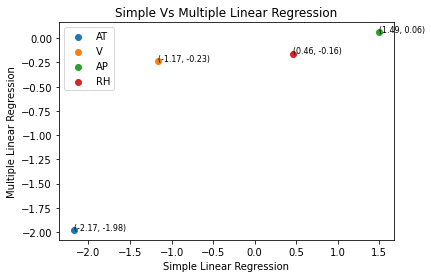

In [12]:
# x axis is simple, y axis is multiple
results = list(zip(single_regression_parameters,model.params[1:]))
# Making a scatter plot
plt.scatter(x= results[0][0],y=results[0][1],label='AT')
plt.scatter(x= results[1][0],y=results[1][1],label='V')
plt.scatter(x= results[2][0],y=results[2][1],label='AP')
plt.scatter(x= results[3][0],y=results[3][1],label='RH')
# Labeling the plot 
plt.legend(loc="upper left")
plt.xlabel('Simple Linear Regression')
plt.ylabel('Multiple Linear Regression')
plt.title('Simple Vs Multiple Linear Regression')
# showing the annotations
for x, y in results:
    plt.text(x, y, '({}, {})'.format(round(x,2), round(y,2)),fontsize=8)

print("Multiple linear regression coef was greater for V and AT, but less than for RH and AP")

### (f) Nonlinear Association

In [13]:
# Refrence -- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
# keeping track of the columns 
columns_unprocessed = df.columns
columns = columns_unprocessed[0:-1]
y = df['PE']
r_squared_values_multi = []
for feature in columns:
    # creating the linear regression
    x = df[f"{feature}"].values.reshape(-1,1)
    # making it to degree 3 
    poly = PolynomialFeatures(degree= 3)
    x= poly.fit_transform(x)
    model = sm.OLS(y, x,).fit()
    print_model = model.summary()
    print('')
    print('')
    print('')
    print(f"X feature in this model is actually {feature}")
    print('')
    print('')
    print('')
    print(print_model)
    r_squared_values_multi.append(model.rsquared)

print('The V**2 and v**3 feature was the only insignficant features in this model ')






X feature in this model is actually AT



                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:30:41   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

There is a small difference between the R^2 values in the multi vs single (althought the multi is slightly better), suggesting the data is nonlinear


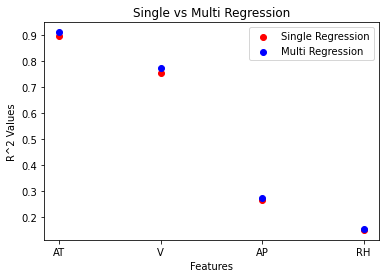

In [14]:
# comparing rsquared values between multi and single
# reference: https://stackoverflow.com/questions/2050637/appending-the-same-string-to-a-list-of-strings-in-python
single_regression_columns = df.columns[0:-1].values.tolist()
plt.scatter(single_regression_columns,r_squared_values_single, color ='r', label ='Single Regression')
plt.scatter(single_regression_columns,r_squared_values_multi, color ='b', label ='Multi Regression')
plt.ylabel('R^2 Values')
plt.legend()
plt.xlabel('Features')
plt.title('Single vs Multi Regression')
print('There is a small difference between the R^2 values in the multi vs single (althought the multi is slightly better), suggesting the data is nonlinear')

### (g) Interactions of Predictors

In [15]:
# reference --https://stackoverflow.com/questions/48169141/apply-a-function-on-all-possible-combination-of-columns-in-a-dataframe-in-python

y= df['PE']
# breaking up all possible combinations of the dataframe
all_combinations = list(itertools.combinations(df.columns[0:-1], 2))
combination_dataframes = []
for i,x  in all_combinations:
    # getting the value of tuple 1
    model1 = df[[i]].values
    # getting the value of tuple 2 
    model2 = df[[x]].values
    # getting the multiplation of the two models
    values = model1 * model2
    new_df = pd.DataFrame(values,columns=[f'{i}*{x}'])
    # concating all the dataframes
    combination_dataframes.append(new_df)

result = pd.concat(combination_dataframes,axis=1)
# all possible columns
x = pd.concat([df.iloc[:,0:-1],result],axis=1)
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
print_model = model.summary()
print(print_model)
print('')
print('AT*V,AT*RH,V*AP,AP*RH are signficant at a level of 0.05')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:30:41   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

/Users/andrewmoore/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### (h) Improvement

In [16]:
# model 1-- only train,test,split
x= df.iloc[:,0:-1]
y= df['PE']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20)


# model
x_train = sm.add_constant(x_train)
x_test= sm.add_constant(x_test)
model = sm.OLS(y_train, x_train).fit()
print_model = model.summary()

# training model
train_yhat = model.predict(x_train)
training_mse = mean_squared_error(train_yhat,y_train)

# testing model
test_yhat = model.predict(x_test)
test_mse = mean_squared_error(test_yhat,y_test)
rsquarescore = r2_score(y_test, test_yhat)


print('The test R^2 is',rsquarescore)
print('The error rate is', (1-rsquarescore)*100)
print("The training MSE is", training_mse)
print("The test MSE is", test_mse)

print("")
print("")
print("")
print(print_model)


The test R^2 is 0.9250751969488731
The error rate is 7.492480305112692
The training MSE is 20.19776821104716
The test MSE is 22.107290402881905



                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                 2.232e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:30:41   Log-Likelihood:                -19567.
No. Observations:                6697   AIC:                         3.914e+04
Df Residuals:                    6692   BIC:                         3.918e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.

/Users/andrewmoore/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [17]:
# model 2 


x= df.iloc[:,0:-1]
y= df['PE']

# x train
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20)


x_train= x_train.reset_index(drop=True)
# breaking up all possible combinations of the dataframe
all_combinations_xtrain = list(itertools.combinations(x_train.columns, 2))
combination_dataframes_xtrain = []
for i,x  in all_combinations_xtrain:
    # getting the value of tuple 1
    model1 = x_train[[i]].values
    # getting the value of tuple 2 
    model2 = x_train[[x]].values
    # getting the multiplation of the two models
    values = model1 * model2
    new_df = pd.DataFrame(values,columns=[f'{i}*{x}'])
    # concating all the dataframes
    combination_dataframes_xtrain.append(new_df)

result_xtrain = pd.concat(combination_dataframes_xtrain,axis=1)
# all columns without quadratic terms 
model_interaction_terms_xtrain = pd.concat([x_train,result_xtrain],axis=1)




# creating a list for the quadratic terms 
quadratic_list =[]
for column in x_train.columns:
    # term
    quad_values = x_train[[f'{column}']].values.reshape(-1,1)
    
    # making it to degree 3 
    quadratic = PolynomialFeatures(degree= 2)
    quadratic_terms= quadratic.fit_transform(quad_values)
    new_quad_df = pd.DataFrame(quadratic_terms,columns=['constant',f'{column}',f'{column}**2'])
    quadratic_list.append(new_quad_df)
    
final_quad_terms = pd.concat(quadratic_list,axis=1)
# only grabbing the quadratic terms 
final_quad_terms=final_quad_terms[['AT**2','V**2','AP**2','RH**2']]
# final_quad_terms


# concating the final df

final_x_train = pd.concat([model_interaction_terms_xtrain,final_quad_terms],axis=1)
final_x_train

,AT,V,AP,RH,AT*V,AT*AP,AT*RH,V*AP,V*RH,AP*RH,AT**2,V**2,AP**2,RH**2
0,10.88,44.63,1020.52,86.81,485.5744,11103.2576,944.4928,45545.8076,3874.3303,88591.3412,118.3744,1991.8369,1.041461e+06,7535.9761
1,13.48,41.92,1030.20,65.96,565.0816,13887.0960,889.1408,43185.9840,2765.0432,67951.9920,181.7104,1757.2864,1.061312e+06,4350.7216
2,6.76,37.49,1011.66,80.91,253.4324,6838.8216,546.9516,37927.1334,3033.3159,81853.4106,45.6976,1405.5001,1.023456e+06,6546.4281
3,13.04,45.09,1013.00,87.68,587.9736,13209.5200,1143.3472,45676.1700,3953.4912,88819.8400,170.0416,2033.1081,1.026169e+06,7687.7824
4,26.31,52.09,1013.39,53.59,1370.4879,26662.2909,1409.9529,52787.4851,2791.5031,54307.5701,692.2161,2713.3681,1.026959e+06,2871.8881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6692,16.49,41.93,1022.92,44.98,691.4257,16867.9508,741.7202,42891.0356,1886.0114,46010.9416,271.9201,1758.1249,1.046365e+06,2023.2004
6693,16.82,47.45,1010.19,88.48,798.1090,16991.3958,1488.2336,47933.5155,4198.3760,89381.6112,282.9124,2251.5025,1.020484e+06,7828.7104
6694,24.16,48.98,1015.19,42.55,1183.3568,24526.9904,1028.0080,49724.0062,2084.0990,43196.3345,583.7056,2399.0404,1.030611e+06,1810.5025
6695,12.89,36.71,1013.36,87.29,473.1919,13062.2104,1125.1681,37200.4456,3204.4159,88456.1944,166.1521,1347.6241,1.026898e+06,7619.5441


In [18]:
# model 2 continued for x test


x_test= x_test.reset_index(drop=True)
# breaking up all possible combinations of the dataframe
all_combinations_xtest = list(itertools.combinations(x_test.columns, 2))
combination_dataframes_xtest = []
for i,x  in all_combinations_xtest:
    # getting the value of tuple 1
    model1 = x_test[[i]].values
    # getting the value of tuple 2 
    model2 = x_test[[x]].values
    # getting the multiplation of the two models
    values = model1 * model2
    new_df = pd.DataFrame(values,columns=[f'{i}*{x}'])
    # concating all the dataframes
    combination_dataframes_xtest.append(new_df)

result_xtest = pd.concat(combination_dataframes_xtest,axis=1)
# all columns without quadratic terms 
model_interaction_terms_xtest = pd.concat([x_test,result_xtest],axis=1)




# creating a list for the quadratic terms 
quadratic_list_xtest =[]
for column in x_test.columns:
    # term
    quad_values_xtest = x_test[[f'{column}']].values.reshape(-1,1)
    
    # making it to degree 3 
    quadratic_x_test = PolynomialFeatures(degree= 2)
    quadratic_terms_xtest= quadratic_x_test.fit_transform(quad_values_xtest)
    new_quad_df_xtest = pd.DataFrame(quadratic_terms_xtest,columns=['constant',f'{column}',f'{column}**2'])
    quadratic_list_xtest.append(new_quad_df_xtest)
    
final_quad_terms_xtest = pd.concat(quadratic_list_xtest,axis=1)
# only grabbing the quadratic terms 
final_quad_terms_xtest=final_quad_terms_xtest[['AT**2','V**2','AP**2','RH**2']]
# final_quad_terms


# concating the final df

final_x_test = pd.concat([model_interaction_terms_xtest,final_quad_terms_xtest],axis=1)
final_x_test

,AT,V,AP,RH,AT*V,AT*AP,AT*RH,V*AP,V*RH,AP*RH,AT**2,V**2,AP**2,RH**2
0,25.20,65.59,1013.00,71.34,1652.8680,25527.6000,1797.7680,66442.6700,4679.1906,72267.4200,635.0400,4302.0481,1.026169e+06,5089.3956
1,22.19,48.78,1017.84,76.01,1082.4282,22585.8696,1686.6619,49650.2352,3707.7678,77366.0184,492.3961,2379.4884,1.035998e+06,5777.5201
2,8.33,38.08,1018.94,73.78,317.2064,8487.7702,614.5874,38801.2352,2809.5424,75177.3932,69.3889,1450.0864,1.038239e+06,5443.4884
3,10.73,44.92,1025.10,85.40,481.9916,10999.3230,916.3420,46047.4920,3836.1680,87543.5400,115.1329,2017.8064,1.050830e+06,7293.1600
4,27.10,79.74,1005.43,86.05,2160.9540,27247.1530,2331.9550,80172.9882,6861.6270,86517.2515,734.4100,6358.4676,1.010889e+06,7404.6025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2866,14.62,46.18,1014.75,96.81,675.1516,14835.6450,1415.3622,46861.1550,4470.6858,98237.9475,213.7444,2132.5924,1.029718e+06,9372.1761
2867,26.69,59.21,1012.55,57.59,1580.3149,27024.9595,1537.0771,59953.0855,3409.9039,58312.7545,712.3561,3505.8241,1.025258e+06,3316.6081
2868,11.87,40.55,1019.06,94.11,481.3285,12096.2422,1117.0857,41322.8830,3816.1605,95903.7366,140.8969,1644.3025,1.038483e+06,8856.6921
2869,23.21,74.22,1009.68,88.46,1722.6462,23434.6728,2053.1566,74938.4496,6565.5012,89316.2928,538.7041,5508.6084,1.019454e+06,7825.1716


In [19]:
# model 2 continued for training and testing 

y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)


# model
final_x_train = sm.add_constant(final_x_train)
final_x_test= sm.add_constant(final_x_test)
model = sm.OLS(y_train, final_x_train).fit()
print_model = model.summary()

# training model
train_yhat = model.predict(final_x_train)
training_mse = mean_squared_error(train_yhat,y_train)

# testing model
test_yhat = model.predict(final_x_test)
test_mse = mean_squared_error(test_yhat,y_test)
rsquarescore = r2_score(y_test, test_yhat)


print('The test R^2 is',rsquarescore)
print('The error rate is', (1-rsquarescore)*100)
print("The training MSE is", training_mse)
print("The test MSE is", test_mse)
print("'AT','V','AT*AP','V*AP','V*RH','V**2' are insignficant")
print("")
print("")
print("")
print(print_model)

The test R^2 is 0.9350908311517397
The error rate is 6.490916884826026
The training MSE is 17.665351927180318
The test MSE is 19.15208031389818
'AT','V','AT*AP','V*AP','V*RH','V**2' are insignficant



                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     7348.
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:30:42   Log-Likelihood:                -19118.
No. Observations:                6697   AIC:                         3.827e+04
Df Residuals:                    6682   BIC:                         3.837e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
        

/Users/andrewmoore/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [20]:
# model 3 

# removing variables that were insignifant at a level of 0.05

final_x_train = final_x_train.drop(columns = ['AT','V','AT*AP','V*AP','V*RH','V**2'])
final_x_test = final_x_test.drop(columns = ['AT','V','AT*AP','V*AP','V*RH','V**2'])



# model
final_x_train = sm.add_constant(final_x_train)
final_x_test= sm.add_constant(final_x_test)
model = sm.OLS(y_train, final_x_train).fit()
print_model = model.summary()

# training model
train_yhat = model.predict(final_x_train)
training_mse = mean_squared_error(train_yhat,y_train)

# testing model
test_yhat = model.predict(final_x_test)
test_mse = mean_squared_error(test_yhat,y_test)

rsquarescore = r2_score(y_test, test_yhat)
print('The test R^2 is',rsquarescore)
print('The error rate is', (1-rsquarescore)*100)
print("The training MSE is", training_mse)
print("The test MSE is", test_mse)

print("")
print("")
print("")
print(print_model)

The test R^2 is 0.9280396837081927
The error rate is 7.196031629180732
The training MSE is 19.747686952994155
The test MSE is 21.232589809554298



                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 1.142e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:30:42   Log-Likelihood:                -19491.
No. Observations:                6697   AIC:                         3.900e+04
Df Residuals:                    6688   BIC:                         3.906e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0

/Users/andrewmoore/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### (i) KNN

In [21]:
# not normalized, raw features

# normalized

bestscore=0 
best_training_score = 0
total_k = 101
training_errors = []
test_errors=[]


x= df[['AT', 'V', 'AP', 'RH']]
y= df['PE']

# splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20)

len(x_train)
for i in range(total_k):
    if i > 0:
        # finding the best k
        knn = KNeighborsRegressor(n_neighbors = i)
        knn.fit(x_train, y_train)
        training_y = knn.predict(x_train)
        # training error
        training_score = r2_score(training_y, y_train)
        y_pred_test = knn.predict(x_test)
        # test error
        current_score = r2_score(y_test, y_pred_test)
        
            # keeping track of the training errors
        training_errors.append((1-training_score)*100)
        
        # keeping track of the test errors
        test_errors.append((1-current_score)*100)
        
        # keeping track of the best score 
        if current_score > bestscore:
            k = i
            bestscore = current_score
            best_training_score = training_score
            

print("The best best r^2 score is", bestscore)
print("The best k is", k)

The best best r^2 score is 0.942634258237767
The best k is 5


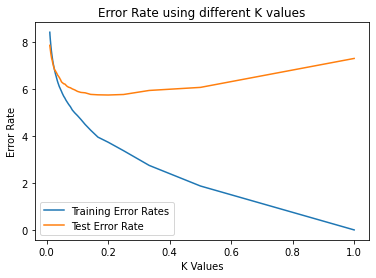

In [22]:
kvalues= list(range(1, 101))
kvalues = [1 / x for x in kvalues]

error_df = pd.DataFrame(list(zip(training_errors, kvalues)), columns =['Training Error Rates', 'K Values'])
error_df['Test Error Rate'] = test_errors

error_df.plot(x = 'K Values', y = ['Training Error Rates','Test Error Rate'])

plt.ylabel('Error Rate')
plt.title('Error Rate using different K values')
plt.xlabel('K Values')
plt.show()

In [23]:
# normalized
# reference --https://scikit-learn.org/stable/modules/model_evaluation.html

bestscore=0 
best_training_score = 0
total_k = 101
training_errors = []
test_errors=[]


df_norm = (df - df.mean()) / (df.max() - df.min())
x= df_norm[['AT', 'V', 'AP', 'RH']]
y= df_norm['PE']

# splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20)

len(x_train)
for i in range(total_k):
    if i > 0:
        # finding the best k
        knn = KNeighborsRegressor(n_neighbors = i)
        knn.fit(x_train, y_train)
        training_y = knn.predict(x_train)
        # training error
        training_score = r2_score(training_y, y_train)
        y_pred_test = knn.predict(x_test)
        # test error
        current_score = r2_score(y_test, y_pred_test)
        
            # keeping track of the training errors
        training_errors.append((1-training_score)*100)
        
        # keeping track of the test errors
        test_errors.append((1-current_score)*100)
        
        # keeping track of the best score 
        if current_score > bestscore:
            k = i
            bestscore = current_score
            best_training_score = training_score
            

print("The best best r^2 score is", bestscore)
print("The best k is", k)


The best best r^2 score is 0.9482591458505231
The best k is 6


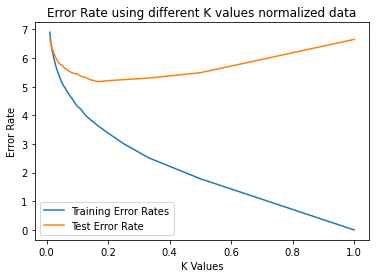




Normalized data ended up having a smaller error rate and does better


In [24]:
kvalues= list(range(1, 101))
kvalues = [1 / x for x in kvalues]

error_df = pd.DataFrame(list(zip(training_errors, kvalues)), columns =['Training Error Rates', 'K Values'])
error_df['Test Error Rate'] = test_errors

error_df.plot(x = 'K Values', y = ['Training Error Rates','Test Error Rate'])

plt.ylabel('Error Rate')
plt.title('Error Rate using different K values normalized data')
plt.xlabel('K Values')
plt.show()

print('')
print('')
print('')
print('Normalized data ended up having a smaller error rate and does better')

### (j ) Compare KNN and Linear

In [25]:
print('The best linear regression was model 2 (multilinear regression) of part H with an R^2 of 0.935 and an error rate of', round((1-0.935)*100),2)
print('The best KNN that had the best accuracy was the normalized data with an R^2 of 0.948 and an error rate of',round((1-0.948)*100,2))
print('The KNN regression has a better fit to the test data and preforms better than the multi linear regression')

The best linear regression was model 2 (multilinear regression) of part H with an R^2 of 0.935 and an error rate of 6 2
The best KNN that had the best accuracy was the normalized data with an R^2 of 0.948 and an error rate of 5.2
The KNN regression has a better fit to the test data and preforms better than the multi linear regression


## 2. ISLR: 2.4.1

### (a) The sample size n is extremely large, and the number of predictors p is small.

In [26]:
# better. because it won't overfit the data

### (b) The number of predictors p is extremely large, and the number of observations n is small.

In [27]:
# worse. it will overfit the small amount of n that does exists and does poorly on the test set

### (c) The relationship between the predictors and response is highly non-linear.

In [28]:
# better. the inflexible method would do worse on highly non-linear data

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

In [29]:
# worse. because it would try to overfit the data and would do poorly on the test set due to the amount of 
# variance of data

## 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

In [30]:
obs1 = m.sqrt((0-0)**2 + (3-0)**2+(0-0)**2)
obs2 = m.sqrt((2-0)**2 + (0-0)**2+(0-0)**2)
obs3 = m.sqrt((0-0)**2 + (1-0)**2+(3-0)**2)
obs4 = m.sqrt((0-0)**2 + (1-0)**2+(2-0)**2)
obs5 = m.sqrt((-1-0)**2 + (0-0)**2+(1-0)**2)
obs6 = m.sqrt((1-0)**2 + (1-0)**2+(1-0)**2)




print("obs1", round(obs1,2))
print("obs2", round(obs2,2))
print("obs3", round(obs3,2))
print("obs4", round(obs4,2))
print("obs5", round(obs5,2))
print("obs6", round(obs6,2))

obs1 3.0
obs2 2.0
obs3 3.16
obs4 2.24
obs5 1.41
obs6 1.73


### (b) What is our prediction with K = 1? Why?

In [31]:
# nearest neighbor is obs 5 with 1.41, so we choose k=1

### (c) What is our prediction with K = 3? Why?

In [32]:
# it would be the average of 2,5,6 (nearest neighbors) so will be red 

### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

In [33]:
# smaller k would be needed because larger k would overfit the data